In [50]:
import os
import re
import nltk
import spacy
import string
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import warnings

In [2]:
category_mapping = {
    "Peoplesoft": "Peoplesoft",
    "React": "React_JS",
    "workday": "Workday",
    "SQL": "SQL Developer"
}

# Function to determine the category based on the filename
def get_category(filename):
    # Check if any keyword exists in the filename
    for keyword, category in category_mapping.items():
        if keyword.lower() in filename.lower():  # Case insensitive check
            return category
    return "Other"  # Return "Other" if no keyword is found

# Function to process the text files and create a DataFrame
def create_dataframe_from_txt(input_folder):
    data = []
    
    # Iterate through all files in the folder
    for filename in os.listdir(input_folder):
        # Process only .txt files
        if filename.endswith(".txt"):
            file_path = os.path.join(input_folder, filename)
            
            # Read the text from the file
            with open(file_path, "r", encoding="utf-8") as file:
                text = file.read()
            
            # Determine the category based on the filename
            category = get_category(filename)
            
            # Append the data as a tuple (text, category, filename)
            data.append((text, category, filename))
    
    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=["data", "category", "filename"])
    
    return df

# Folder path where the .txt files are located
input_folder = r"C:\Users\polpi\Desktop\data science\project\Resumes-20211103T133301Z-001.zip (Unzipped Files)\res_txt"

# Create the DataFrame
df = create_dataframe_from_txt(input_folder)
df

,data,category,filename
0,Core Competencies : Scripting : Shell Scripti...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_AnubhavSin...
1,\n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_G Ananda R...
2,PeopleSoft Database Administrator\n ...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_Gangareddy...
3,Murali\nExperience Summary \nI have 6 years of...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_Murali.txt
4,"Priyanka Ramadoss\n61/46, MountPleasant, \nCoo...",Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_Priyanka R...
...,...,...,...
74,\tWorkday Integration Consultant\n\nName ...,Workday,workday resumes_Sri Krishna S_Hexaware.txt
75,Srikanth (WORKDAY hCM Consultant)\nSeeking sui...,Workday,workday resumes_Srikanth-Hexaware.txt
76,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...,Workday,workday resumes_SSKumar_Hexaware.txt
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Workday,workday resumes_Venkateswarlu B_Hexaware.txt


In [3]:
df.shape

(79, 3)

In [4]:
df.isnull().sum()

data        0
category    0
filename    0
dtype: int64

In [5]:
df['words'] = df['data'].apply(lambda x: len(str(x).split(" ")))
df[['data','words']]

,data,words
0,Core Competencies : Scripting : Shell Scripti...,1062
1,\n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...,1431
2,PeopleSoft Database Administrator\n ...,1346
3,Murali\nExperience Summary \nI have 6 years of...,575
4,"Priyanka Ramadoss\n61/46, MountPleasant, \nCoo...",670
...,...,...
74,\tWorkday Integration Consultant\n\nName ...,904
75,Srikanth (WORKDAY hCM Consultant)\nSeeking sui...,970
76,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...,1062
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1027


In [6]:
df['chars'] = df['data'].str.len()
df[['data','chars']]

,data,chars
0,Core Competencies : Scripting : Shell Scripti...,7786
1,\n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...,8047
2,PeopleSoft Database Administrator\n ...,6768
3,Murali\nExperience Summary \nI have 6 years of...,4551
4,"Priyanka Ramadoss\n61/46, MountPleasant, \nCoo...",5076
...,...,...
74,\tWorkday Integration Consultant\n\nName ...,6967
75,Srikanth (WORKDAY hCM Consultant)\nSeeking sui...,6455
76,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...,8034
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,6627


In [7]:
df

,data,category,filename,words,chars
0,Core Competencies : Scripting : Shell Scripti...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_AnubhavSin...,1062,7786
1,\n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_G Ananda R...,1431,8047
2,PeopleSoft Database Administrator\n ...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_Gangareddy...,1346,6768
3,Murali\nExperience Summary \nI have 6 years of...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_Murali.txt,575,4551
4,"Priyanka Ramadoss\n61/46, MountPleasant, \nCoo...",Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_Priyanka R...,670,5076
...,...,...,...,...,...
74,\tWorkday Integration Consultant\n\nName ...,Workday,workday resumes_Sri Krishna S_Hexaware.txt,904,6967
75,Srikanth (WORKDAY hCM Consultant)\nSeeking sui...,Workday,workday resumes_Srikanth-Hexaware.txt,970,6455
76,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...,Workday,workday resumes_SSKumar_Hexaware.txt,1062,8034
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Workday,workday resumes_Venkateswarlu B_Hexaware.txt,1027,6627


In [12]:
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
def preprocess(sentence):
    sentence = str(sentence).lower()
    sentence = BeautifulSoup(sentence, "html.parser").get_text()    
    # Remove URLs and numbers
    sentence = re.sub(r'http\S+|www\S+', '', sentence)
    sentence = re.sub(r'\d+', '', sentence)   
    # Tokenize the sentence
    tokens = word_tokenize(sentence)    
    # Filter out stopwords and words with length <= 2
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if len(word) > 2 and word not in stop_words and word.isalpha()]

    return " ".join(filtered_words)

In [13]:
df['data'] = df.data.apply(lambda x: preprocess(x))
df

,data,category,filename,words,chars
0,core competencies scripting shell scripting ap...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_AnubhavSin...,1062,7786
1,profile summary years experience implementing ...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_G Ananda R...,1431,8047
2,peoplesoft database administrator gangareddy p...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_Gangareddy...,1346,6768
3,murali experience summary years experience wor...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_Murali.txt,575,4551
4,priyanka ramadoss mountpleasant coonoor career...,Peoplesoft,Peoplesoft resumes_Peoplesoft Admin_Priyanka R...,670,5076
...,...,...,...,...,...
74,workday integration consultant name sri krishn...,Workday,workday resumes_Sri Krishna S_Hexaware.txt,904,6967
75,srikanth workday hcm consultant seeking suitab...,Workday,workday resumes_Srikanth-Hexaware.txt,970,6455
76,workday hcm fcm name kumar role workday consul...,Workday,workday resumes_SSKumar_Hexaware.txt,1062,8034
77,workday consultant years experience years expe...,Workday,workday resumes_Venkateswarlu B_Hexaware.txt,1027,6627


In [14]:
df.data[2]

'peoplesoft database administrator gangareddy professional objective work professional challenging environment best utilizing talent keeping abreast latest technical advancement field peoplesoft application dba derive utmost job satisfaction knowledge field become successful oracle peoplesoft application dba activities professional summary years experience peoplesoft applications experience creating configuring application server domains created multiple server domains separate host systems access one database effective strategy performance tuning experience application server administration ensured system availability implementing failover spreading multiple domains across multiple hosts peoplesoft server administration expertise installation configuration setup management database peoplesoft internet architecture pia environment related processing objects extensive experience applying tax updates patches fixes bundles maintenance packs experienced peoplesoft applications administrato

In [16]:
from collections import Counter
from nltk.corpus import stopwords  # Rename the imported stopwords
import string
stopwords_set = set(stopwords.words('english') + ['``', "''"])

totalWords = []
cleaneddata = []

s = df['data'].values
for records in s:
    cleanedText = preprocess(records)
    cleaneddata.append(cleanedText)


all_text = " ".join(cleaneddata)
requiredWords = nltk.word_tokenize(all_text)

totalWords = [
    word for word in requiredWords
    if word not in stopwords_set and word not in string.punctuation
]

wordfreqdist = Counter(totalWords)
mostcommon = wordfreqdist.most_common(50)

print(mostcommon)

[('experience', 596), ('peoplesoft', 416), ('workday', 416), ('application', 410), ('using', 395), ('server', 353), ('data', 331), ('reports', 323), ('project', 310), ('business', 270), ('database', 242), ('sql', 237), ('web', 236), ('process', 233), ('worked', 218), ('knowledge', 213), ('system', 191), ('client', 190), ('involved', 189), ('tools', 188), ('integrations', 185), ('like', 180), ('integration', 179), ('support', 175), ('skills', 171), ('hcm', 169), ('good', 169), ('team', 163), ('creating', 163), ('development', 163), ('working', 162), ('people', 159), ('servers', 153), ('services', 153), ('design', 152), ('technical', 151), ('testing', 150), ('report', 147), ('various', 146), ('created', 146), ('security', 134), ('management', 133), ('eib', 132), ('oracle', 131), ('production', 131), ('responsibilities', 131), ('issues', 129), ('studio', 128), ('developer', 126), ('environment', 125)]


In [43]:
most_common_dict = dict(mostcommon)
common_words_df = pd.DataFrame(list(most_common_dict.items()), columns=['Word', 'Count'])
common_words_df

,Word,Count
0,experience,596
1,peoplesoft,416
2,workday,416
3,application,410
4,using,395
5,server,353
6,data,331
7,reports,323
8,project,310
9,business,270


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


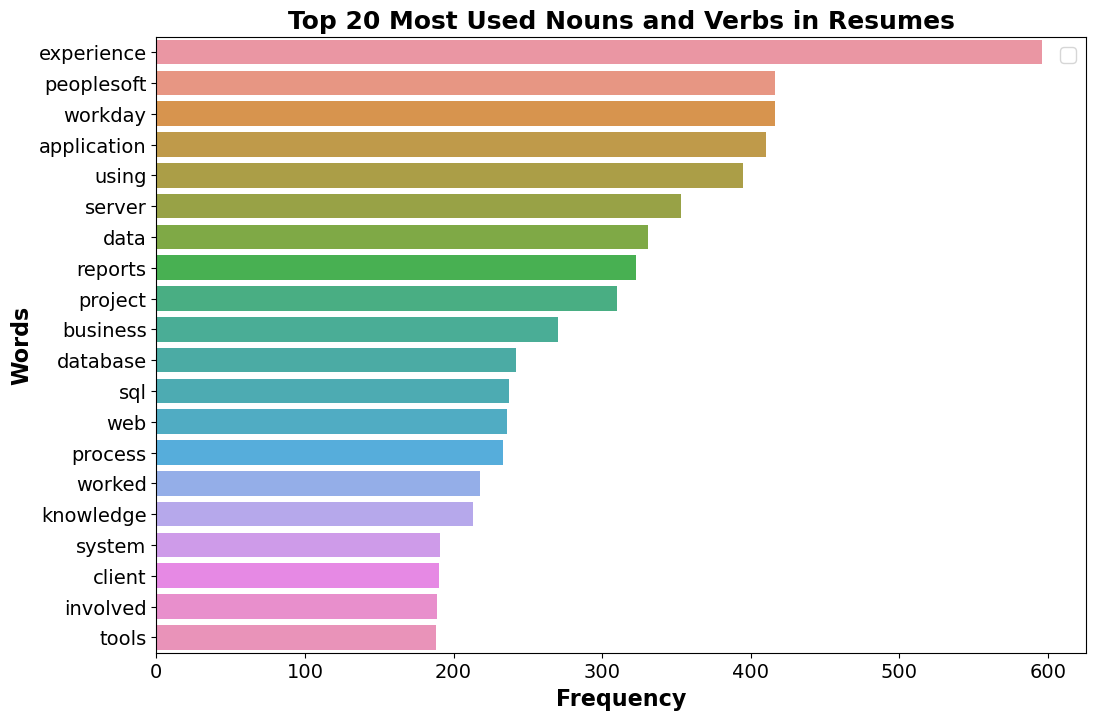

In [47]:
top_words = common_words_df.head(20)
fig, axe = plt.subplots(figsize=(12, 8))
sns.barplot(x=top_words['Count'], y=top_words['Word'], data=top_words, ax=axe)

axe.set_xlabel('Frequency', size=16, fontweight='bold')
axe.set_ylabel('Words', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large')
plt.title('Top 20 Most Used Nouns and Verbs in Resumes', fontsize=18, fontweight='bold')
plt.rcParams.update({'xtick.labelsize': 14, 'ytick.labelsize': 14, 'axes.labelsize': 16})
plt.show()

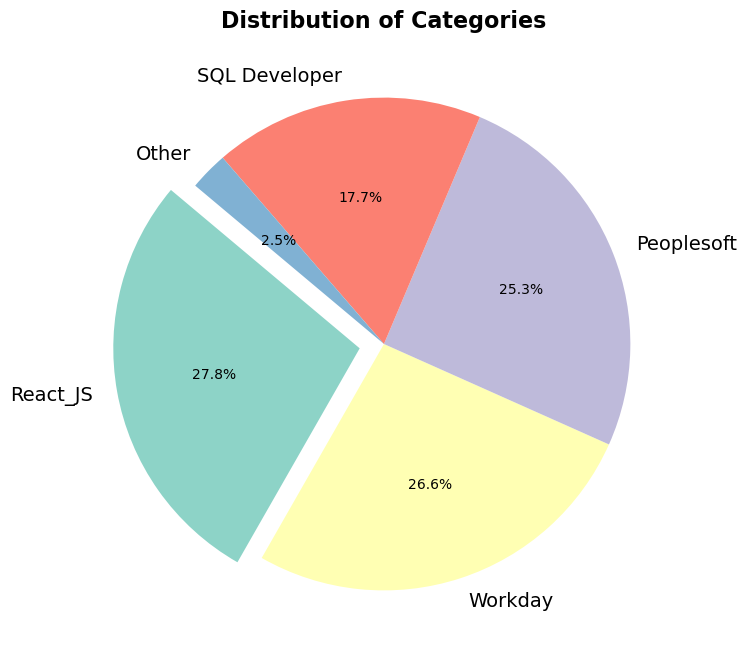

In [49]:
import matplotlib.pyplot as plt
category_counts = df['category'].value_counts()
explode = [0.1 if i == 0 else 0 for i in range(len(category_counts))]
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=sns.color_palette('Set3', len(category_counts)))
plt.title('Distribution of Categories', fontsize=16, fontweight='bold')
plt.show()
